In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_7052\1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("SaleData.xlsx")

In [3]:
df.shape

(43, 8)

In [4]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Manager     43 non-null     object        
 3   SalesMan    43 non-null     object        
 4   Item        43 non-null     object        
 5   Units       43 non-null     int64         
 6   Unit_price  43 non-null     float64       
 7   Sale_amt    43 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.8+ KB


In [6]:
#check missing values
df.isnull().sum()

OrderDate     0
Region        0
Manager       0
SalesMan      0
Item          0
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

Summary statistics of numerical cols

In [7]:
df.describe()

,OrderDate,Units,Unit_price,Sale_amt
count,43,43.000000,43.000000,43.000000
mean,2018-12-29 00:00:00,49.325581,581.011628,30364.546512
min,2018-01-06 00:00:00,2.000000,58.500000,250.000000
25%,2018-07-03 12:00:00,27.500000,225.000000,3978.000000
50%,2018-12-29 00:00:00,53.000000,500.000000,17100.000000
75%,2019-06-25 12:00:00,74.500000,1198.000000,42529.000000
max,2019-12-21 00:00:00,96.000000,1198.000000,113810.000000
std,NaN,30.078248,442.285830,32424.588323


Summary statistics of character columns
describe() function with an argument named include along with value object(include='object') gives the summary statistics of the character columns.

In [8]:
df.describe(include=['object'])

,Region,Manager,SalesMan,Item
count,43,43,43,43
unique,3,4,11,5
top,Central,Martha,Alexander,Home Theater
freq,24,14,8,15


Summary statistics for all columns
include='all'

In [9]:
df.describe(include='all')

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
count,43,43,43,43,43,43.000000,43.000000,43.000000
unique,NaN,3,4,11,5,NaN,NaN,NaN
top,NaN,Central,Martha,Alexander,Home Theater,NaN,NaN,NaN
freq,NaN,24,14,8,15,NaN,NaN,NaN
mean,2018-12-29 00:00:00,NaN,NaN,NaN,NaN,49.325581,581.011628,30364.546512
min,2018-01-06 00:00:00,NaN,NaN,NaN,NaN,2.000000,58.500000,250.000000
25%,2018-07-03 12:00:00,NaN,NaN,NaN,NaN,27.500000,225.000000,3978.000000
50%,2018-12-29 00:00:00,NaN,NaN,NaN,NaN,53.000000,500.000000,17100.000000
75%,2019-06-25 12:00:00,NaN,NaN,NaN,NaN,74.500000,1198.000000,42529.000000
max,2019-12-21 00:00:00,NaN,NaN,NaN,NaN,96.000000,1198.000000,113810.000000


measures of central tendency
-mean
-median
-mode

In [10]:
mean = df['Sale_amt'].mean()
median = df['Sale_amt'].median()
mode = df['Item'].mode()
print("mean=",mean)
print("median=",median)
print("mode:",mode)

mean= 30364.54651162791
median= 17100.0
mode: 0    Home Theater
Name: Item, dtype: object


here mean > median 
i.e, positively skewed distribution

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_7052\2292595657.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: xlabel='Sale_amt', ylabel='Density'>

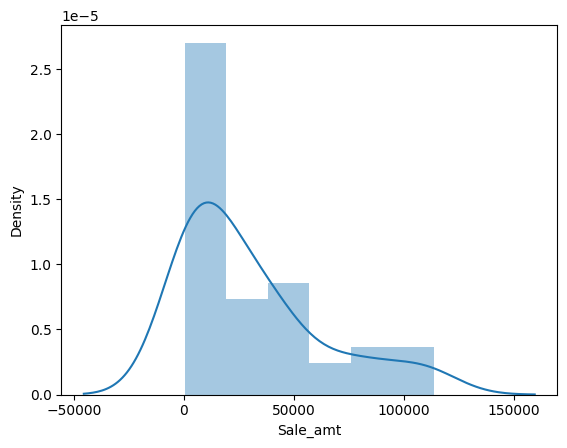

In [11]:
data = df['Sale_amt']

import seaborn as sns
sns.distplot(data)

Measure of Dispersion( Range, IQR, Variance, Standard Deviation, Coefficient of variation)

In [12]:
#minimum value
minima = df['Sale_amt'].min()

#maximum value
maxima = df['Sale_amt'].max()

range = maxima - minima
print(range)

113560.0


In [13]:
#median / Q2 / 50th percentile
Q2 = df['Sale_amt'].quantile(0.5)

# 75th percentile / Q3
Q3 = df['Sale_amt'].quantile(0.75)

# 25th percentile / Q1
Q1 = df['Sale_amt'].quantile(0.25)

IQR = Q3-Q1
print(IQR)

38551.0


In [14]:
# variance
variance = df['Sale_amt'].var()

#standard deviation
std = df['Sale_amt'].std()

print(variance, std)

1051353927.9382613 32424.588323342847


measures of shape of distribution

skewness (measure of symmery)

In [15]:
df['Sale_amt'].skew()

1.255534529949316

The skewness is slightly greater than 1.
So the data is positive skewed / right skewed

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_7052\1154227836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: xlabel='Sale_amt', ylabel='Density'>

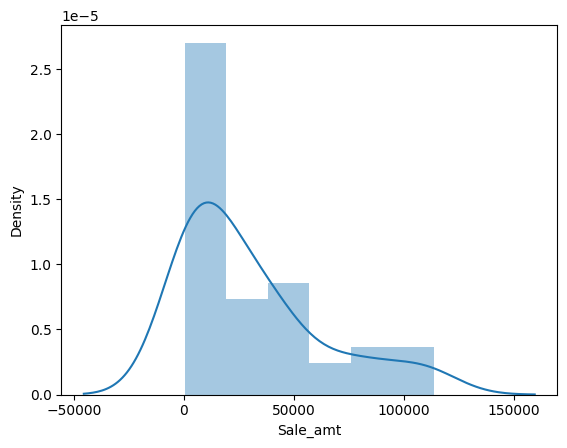

In [16]:
data = df['Sale_amt']
sns.distplot(data)

Kurtosis (measure of heaviness)
(Positive kurtosis indicates heavier tails and a more peaked distribution, while negative kurtosis suggests lighter tails and a flatter distribution)
Kurtosis helps in analyzing the characteristics and outliers of a dataset.
high kurtosis value suggests that the distribution has more outliers and extreme values in its tails compared to a normal distribution,

In [17]:
df['Sale_amt'].kurt()

0.6808764315640965